In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [2]:
(x_train, y_train),(X_test,y_test) =mnist.load_data()

In [3]:
x_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

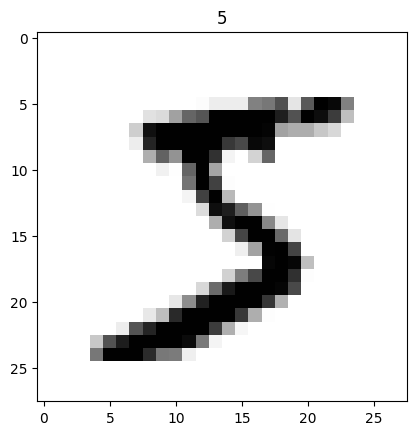

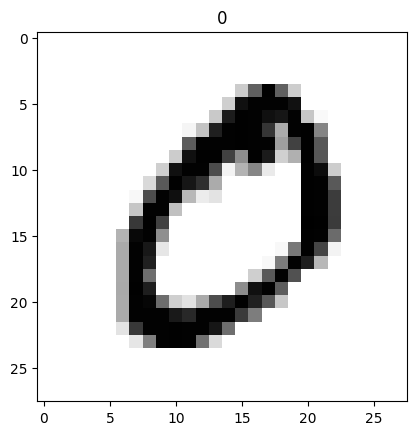

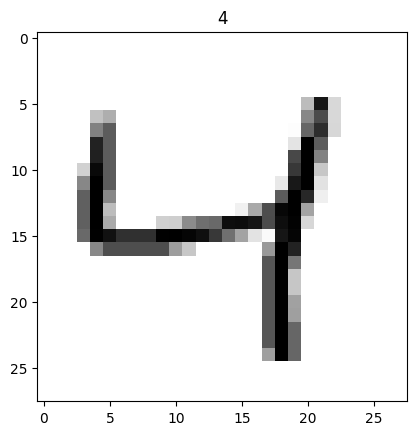

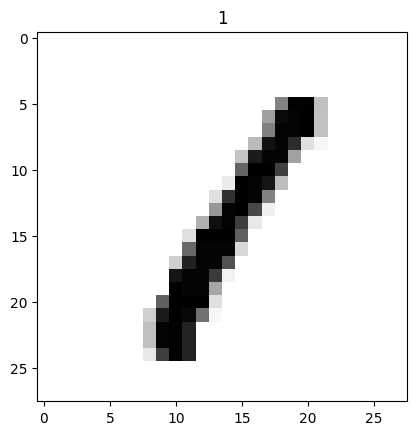

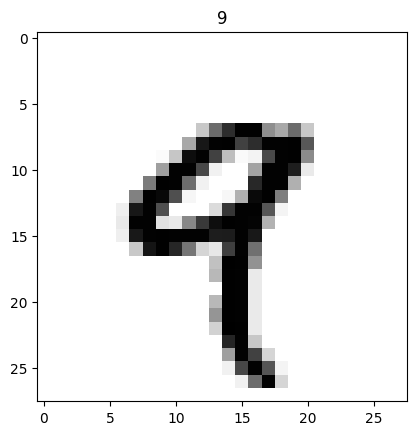

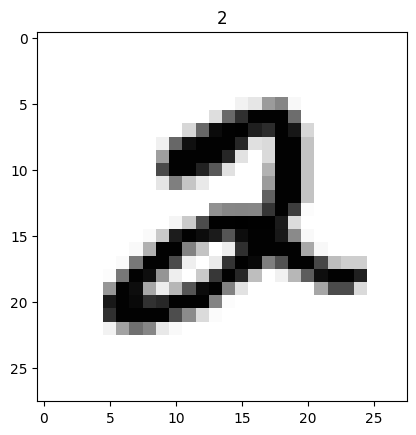

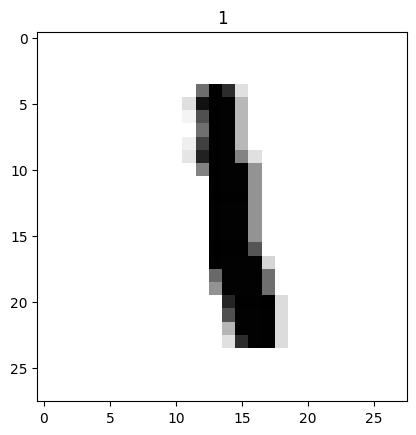

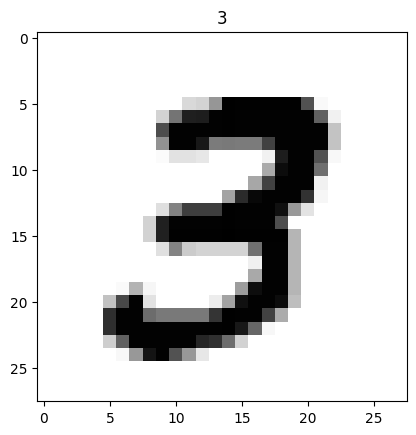

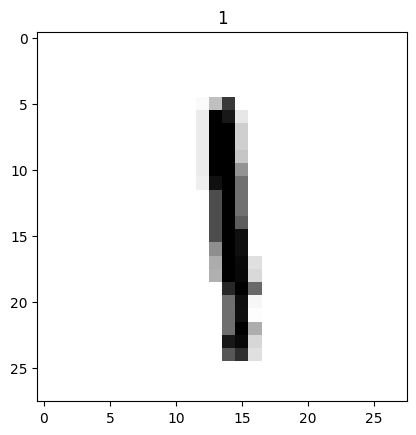

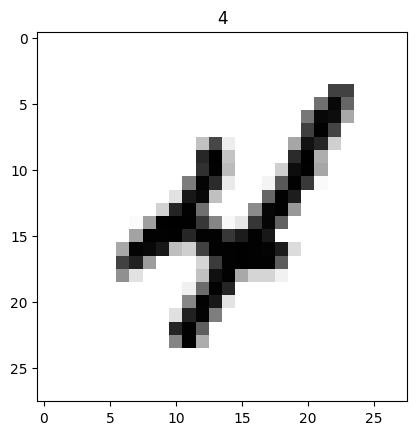

In [5]:
for i in range(10):
    plot_input(i)

### Preprocess the data

In [6]:
x_train=x_train.astype(np.float32)/255.0
X_test=X_test.astype(np.float32)/255.0

In [7]:
x_train=np.expand_dims(x_train,axis=-1)
X_test=np.expand_dims(X_test,axis=-1)
# Reason to make it 3D (28x28x1) is the pixels are 28x28

In [8]:
# convert classes to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=5)
mc=ModelCheckpoint('best_model.keras',monitor='val_acc',verbose=1, save_best_only=True)
cb=[es,mc]

In [13]:
his=model.fit(x_train,y_train,batch_size=50,epochs=5,validation_split=0.3,callbacks=cb)

Epoch 1/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8392 - loss: 0.5361 - val_accuracy: 0.9732 - val_loss: 0.0857
Epoch 2/5


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


840/840 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9735 - loss: 0.0867 - val_accuracy: 0.9804 - val_loss: 0.0640
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9803 - loss: 0.0619 - val_accuracy: 0.9849 - val_loss: 0.0495
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accuracy: 0.9857 - val_loss: 0.0482
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9867 - loss: 0.0416 - val_accuracy: 0.9856 - val_loss: 0.0459


In [14]:
score=model.evaluate(X_test,y_test)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0447
0.9876000285148621


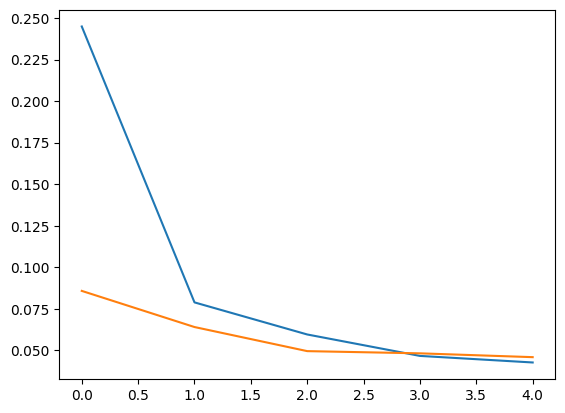

In [15]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

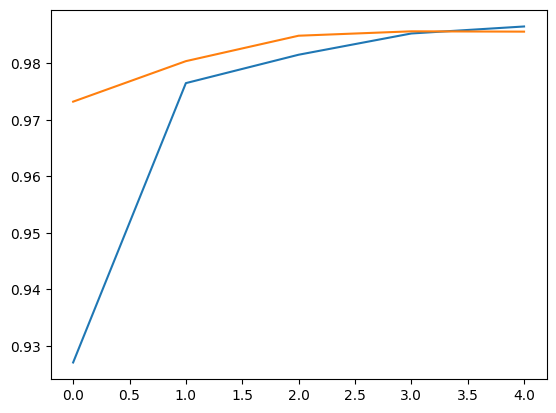

In [16]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])

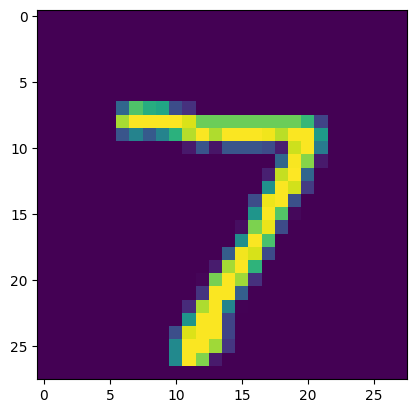

In [17]:
plt.imshow(X_test[0])

In [18]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([7], dtype=int64)